In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D #library for 3D-plot

## Bayesian decision theory와 Classification (분류)

#### Bayes' rule

## $P( \omega_j | \mathbf{x} ) = \frac{p(\mathbf{x} | \omega_j) P(\omega_j)}{p(\mathbf{x})} = \frac{p(\mathbf{x} | \omega_j) P(\omega_j)}{\sum_{k}{p(\mathbf{x}|\omega_k)P(\omega_k)}}$

Bayesian decision theory는 분류(classification) 문제에 있어서 에러의 확률 $P(error) = \int{p(error, \mathbf{x}) d\mathbf{x}} = \int{p(error | \mathbf{x}) p(\mathbf{x}) d\mathbf{x}}$ 을 낮추기 위해서 어떤 선택을 해야되는지에 대한 확률적인 해법을 제시한다.

### [Exercise 1] Naive Bayes with 1D Gaussian distribution

1차원 정규 분포 함수 
- $f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}}e^{ -\frac{(x-\mu)^2}{2 \sigma^2}} $ 

In [2]:
# probability density function for 1D gaussian distribution
def gaussian_pdf(x, mu, sigma):
    # implement here

IndentationError: expected an indented block (<ipython-input-2-89c94c42b4dd>, line 3)

아래의 1차원 정규 분포를 시각화

- $x_1 \sim \mathcal{N}(\mu = 0, \sigma = 1)$

- $x_2 \sim \mathcal{N}(\mu = 4, \sigma = 1)$

아래 방정식을 만족하는 $x$는?

- $f(x; 0, 1) = f(x; 4, 1)$

In [3]:
xMin = -5
xMax = 10
xStepSize = 0.01
xVal = np.arange(xMin,xMax,xStepSize)

mu1 = 0
sigma1 = 1

mu2 = 4
sigma2 = 1

pdf1 = gaussian_pdf(xVal, mu1, sigma1)
pdf2 = gaussian_pdf(xVal, mu2, sigma2)

plt.figure(figsize=(10,3))
plt.plot(xVal, pdf1, color='red')
plt.plot(xVal, pdf2, color='blue')
plt.plot(xVal, (pdf1 > pdf2), color='black')
plt.show()

NameError: name 'gaussian_pdf' is not defined

아래의 1차원 정규 분포를 시각화

- $x_1 \sim \mathcal{N}(\mu = 0, \sigma = 1)$

- $x_2 \sim \mathcal{N}(\mu = 4, \sigma = 3)$

아래 방정식을 만족하는 $x$는?

- $f(x; 0, 1) = f(x; 4, 3)$

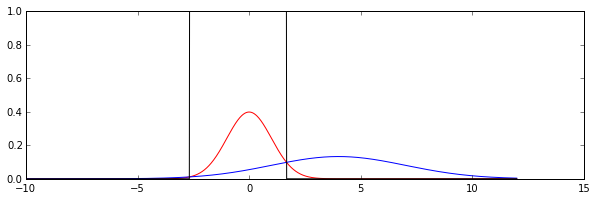

In [40]:
xMin = -10
xMax = 12
xStepSize = 0.01
xVal = np.arange(xMin,xMax,xStepSize)

mu1 = 0
sigma1 = 1

mu2 = 4
sigma2 = 3

pdf1 = gaussian_pdf(xVal, mu1, sigma1)
pdf2 = gaussian_pdf(xVal, mu2, sigma2)

plt.figure(figsize=(10,3))
plt.plot(xVal, pdf1, color='red')
plt.plot(xVal, pdf2, color='blue')
plt.plot(xVal, (pdf1 > pdf2), color='black')

plt.show()

### Multivariate Normal distribution의 covariance의 형태에 따른 decision boundary의 모양

2차원의 정규 분포 확률 밀도 함수는 다음과 같다.

$f(\begin{bmatrix}x\\ y \end{bmatrix}) = \frac{1}{2\pi \sqrt{(\Sigma_{11} \Sigma_{22} - \Sigma_{12} \Sigma_{21})}}$ $exp \left( -\frac{1}{2}   \begin{bmatrix}x - \mu_1 & y - \mu_2 \end{bmatrix} \begin{bmatrix} \Sigma_{11} & \Sigma_{12} \\ \Sigma_{21} & \Sigma_{22} \end{bmatrix}^{-1} \begin{bmatrix}x - \mu_1 \\ y - \mu_2 \end{bmatrix} \right)$

### Discriminant Functions for the Normal Density

###  $p(\mathbf{x}|w_i)=\frac{1}{(2\pi)^\frac{d}{2} |\boldsymbol\Sigma_i|^\frac{1}{2}} e^{-\frac{1}{2} (\mathbf{x} -\boldsymbol{\mu}_i)^T \boldsymbol\Sigma_i^{-1} (\mathbf{x} -\boldsymbol{\mu}_i)}$
### $g_i(\mathbf{x}) = \ln p(\mathbf{x}|w_i) + \ln P(w_i)$


### case 1 :  $\boldsymbol\Sigma = \sigma^2\mathbf{I}$
### $g_i(\mathbf{x}) = -\frac{1}{2\sigma^2} \| \mathbf{x}-\boldsymbol{\mu_i} \| ^2 + \ln P(w_i)$
### $g_i(\mathbf{x}) = \mathbf{w}_i^T\mathbf{x} + w_{i0}$
### decision boundary =  {$\mathbf{x} | \mathbf{w}^T(\mathbf{x}-\mathbf{x_0})=0$}
### - $\mathbf{w} = \boldsymbol{\mu_i}-\boldsymbol{\mu_j}$
### - $\mathbf{x_0} = \frac{1}{2} (\boldsymbol{\mu_i}+\boldsymbol{\mu_j}) - \frac{\sigma^2}{\|\boldsymbol{\mu_i}-\boldsymbol{\mu_j}\|^2} \ln \frac{ P(w_i)}{P(w_j)} (\boldsymbol{\mu_i}-\boldsymbol{\mu_j})$
#### $P(w_i)=P(w_j)$ 라고 가정하면,
### - $\mathbf{x_0} = \frac{1}{2} (\boldsymbol{\mu_i}+\boldsymbol{\mu_j}) $


In [4]:
def visualize_decision_boundary(mu1, mu2, cov1, cov2, gg):
    from scipy.stats import multivariate_normal

    var1 = multivariate_normal(mean=mu1, cov=cov1)
    var2 = multivariate_normal(mean=mu2, cov=cov2)

    minVal   = -10
    maxVal   = 10
    stepSize = 0.05
    xAxisVal = np.arange(minVal, maxVal, stepSize)
    yAxisVal = np.arange(minVal, maxVal, stepSize)
    xx, yy = np.meshgrid(xAxisVal, yAxisVal)

    surfvar1 = plt.contour(xx,yy,var1.pdf(np.stack([xx,yy],2)))  
    surfvar2 = plt.contour(xx,yy,var2.pdf(np.stack([xx,yy],2)))  
    surf = plt.contour(xx,yy,var1.pdf(np.stack([xx,yy], 2))>var2.pdf(np.stack([xx,yy], 2)))
    
    surfg = plt.plot(xAxisVal, gg(xAxisVal, mu1,mu2,cov1), '--')
    plt.colorbar(shrink=0.5, aspect=3)

#### (1) $\Sigma_i = \sigma^2 I$ Identity Matrix에 상수가 곱해져있는 형태 ($P(w_i)=P(w_j)$가정)

### decision boundary를 그리는 함수
### - $ \mathbf{w}^T(\mathbf{x}-\mathbf{x_0})=0 \rightarrow y=a*x+b$ 이 형태로 바꾸어서 plot

In [5]:
def g1(xx, mu1, mu2, sigma):
  # implement here
  # return  

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


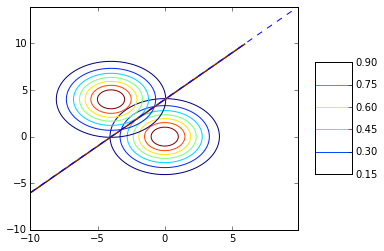

In [6]:
mu1 = np.array([0,0])
mu2 = np.array([-4,4])
sigma = 2
cov = (sigma*sigma) * np.eye(2) # Identity matrix

visualize_decision_boundary(mu1, mu2, cov, cov, g1)

#### (2) $\Sigma_i = \Sigma$

### case 2 :  $\boldsymbol\Sigma_i = \Sigma$
### $g_i(\mathbf{x}) = -\frac{1}{2} (\mathbf{x}-\boldsymbol{\mu_i})^T \Sigma^{-1} (\mathbf{x}-\boldsymbol{\mu_i}) + \ln P(w_i)$
### decision boundary =  {$\mathbf{x} | \mathbf{w}^T(\mathbf{x}-\mathbf{x_0})=0$}
### - $\mathbf{w} = \Sigma^{-1}(\boldsymbol{\mu_i}-\boldsymbol{\mu_j})$
### - $\mathbf{x_0} = \frac{1}{2} (\boldsymbol{\mu_i}+\boldsymbol{\mu_j}) - \frac{1}{(\boldsymbol{\mu_i}-\boldsymbol{\mu_j})^T \Sigma^{-1} (\boldsymbol{\mu_i}-\boldsymbol{\mu_j})} \ln \frac{ P(w_i)}{P(w_j)} (\boldsymbol{\mu_i}-\boldsymbol{\mu_j})$

In [7]:
def g2(xx, mu1, mu2, Sigma):
  # implement here

[ 0.9 -0.8]


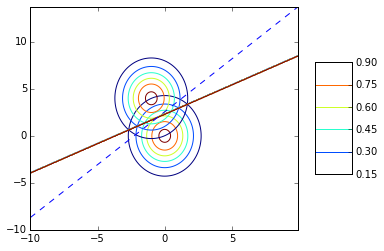

In [8]:
mu1 = np.array([0,0])
mu2 = np.array([-1,4])
cov = np.array([[2, 1], [0, 5]])
#cov = np.array([[1, 0], [0, 1]])

visualize_decision_boundary(mu1, mu2, cov, cov, g2)

#### (3) $\Sigma_i = $ arbitrary (positive-semi definite matrix)

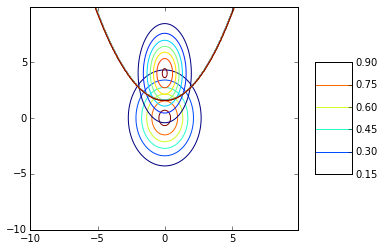

In [28]:
mu1 = np.array([0,0])
mu2 = np.array([0,4])
cov1 = np.array([[2, 1], [0, 5]])
cov2 = np.array([[1, 0], [0, 5]])

visualize_decision_boundary(mu1, mu2, cov1, cov2)